In [1]:
# parameters
n_folds = 5
seed = 42
num_classes = 2
num_queries = 100
null_class_coef = 0.5
BATCH_SIZE = 8
LR = 2e-5
EPOCHS = 2

In [ ]:
!git clone https://github.com/facebookresearch/detr.git   #cloning github repo of detr to import its unique loss - only needs to be run once

In [2]:
from src.custom_dataloader import *
from src.data_augmentations import *

from src.trainer import run 
from src.evaluator import model_eval


/Users/anushkafernando/code/vit-example/src/trainer.py:6: TqdmExperimentalWarning: Using `tqdm.autonotebook.tqdm` in notebook mode. Use `tqdm.tqdm` instead to force console mode (e.g. in jupyter console)
  from tqdm.autonotebook import tqdm


In [3]:
marking = pd.read_csv('/Users/anushkafernando/code/vit-example/input/global-wheat-detection/train.csv')
bboxs, marking = bboxs_marking(marking)
df_folds = create_folds(n_folds, seed, marking)


/Users/anushkafernando/miniconda3/envs/vit-mac/lib/python3.9/site-packages/sklearn/model_selection/_split.py:700: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  warnings.warn(


/Users/anushkafernando/miniconda3/envs/vit-mac/lib/python3.9/site-packages/albumentations/augmentations/dropout/cutout.py:49: FutureWarning: Cutout has been deprecated. Please use CoarseDropout
  warnings.warn(
Using cache found in /Users/anushkafernando/.cache/torch/hub/facebookresearch_detr_main
/Users/anushkafernando/miniconda3/envs/vit-mac/lib/python3.9/site-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/Users/anushkafernando/miniconda3/envs/vit-mac/lib/python3.9/site-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=ResNet50_Weights.IMAGENET1K_V1`. You can also use `weights=ResNet50_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)


  0%|          | 0/338 [00:00<?, ?it/s]

/Users/anushkafernando/miniconda3/envs/vit-mac/lib/python3.9/site-packages/torch/nn/functional.py:3936: UserWarning: MPS: 'nearest' mode upsampling is supported natively starting from macOS 13.0. Falling back on CPU. This may have performance implications. (Triggered internally at /Users/runner/work/pytorch/pytorch/pytorch/aten/src/ATen/native/mps/operations/UpSample.mm:241.)
  return torch._C._nn.upsample_nearest2d(input, output_size, scale_factors)
/Users/anushkafernando/.cache/torch/hub/facebookresearch_detr_main/models/position_encoding.py:33: UserWarning: torch.cumsum supported by MPS on MacOS 13+, please upgrade (Triggered internally at /Users/runner/work/pytorch/pytorch/pytorch/aten/src/ATen/native/mps/operations/UnaryOps.mm:372.)
  y_embed = not_mask.cumsum(1, dtype=torch.float32)
/Users/anushkafernando/miniconda3/envs/vit-mac/lib/python3.9/site-packages/torch/autograd/__init__.py:204: UserWarning: The operator 'aten::sgn.out' is not currently supported on the MPS backend and w

  0%|          | 0/85 [00:00<?, ?it/s]

|EPOCH 1| TRAIN_LOSS 1.3170538357729038| VALID_LOSS 0.9396702422815211|


  0%|          | 0/338 [00:00<?, ?it/s]

  0%|          | 0/85 [00:00<?, ?it/s]

|EPOCH 2| TRAIN_LOSS 1.0127789667372167| VALID_LOSS 0.8963243870174183|


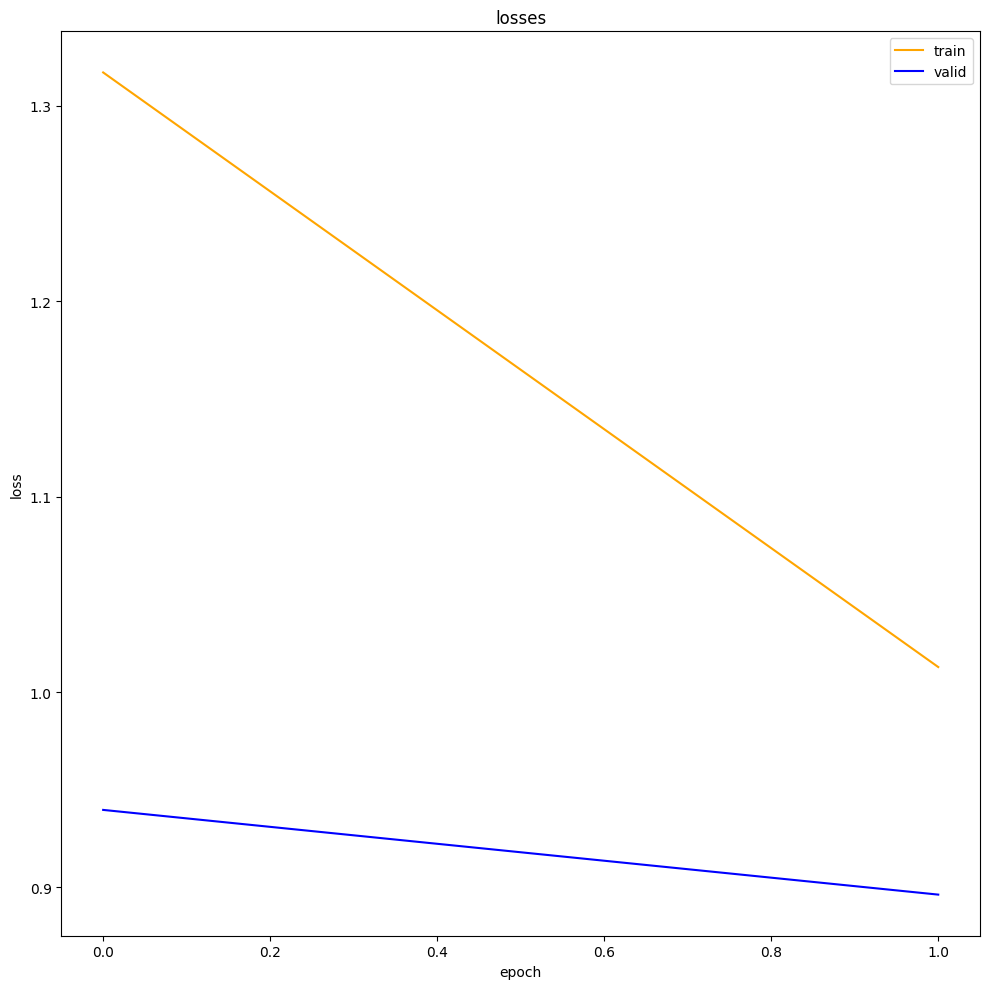

In [4]:
run(df_folds, fold=0, EPOCHS=EPOCHS, marking=marking, BATCH_SIZE=BATCH_SIZE, num_classes=num_classes,num_queries=num_queries, null_class_coef= null_class_coef, LR=LR)

In [5]:
model_weights_file = "./detr_best_0_43.pth"

Using cache found in /Users/anushkafernando/.cache/torch/hub/facebookresearch_detr_main
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


mean_iou: 0.18891554664973276


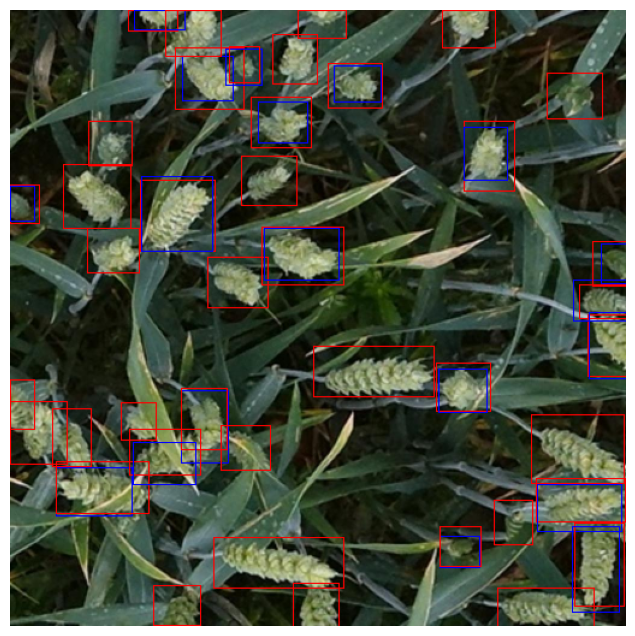

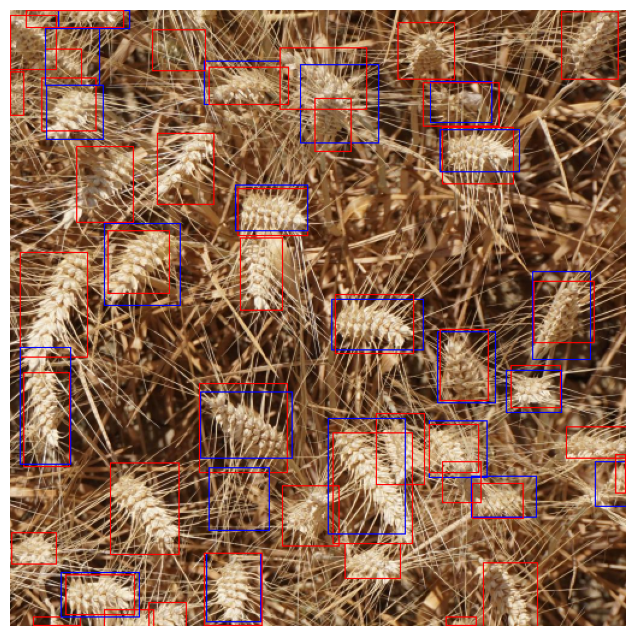

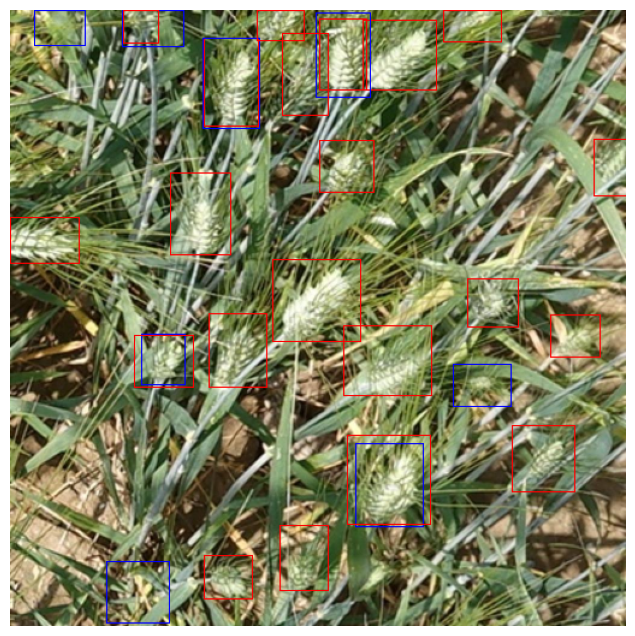

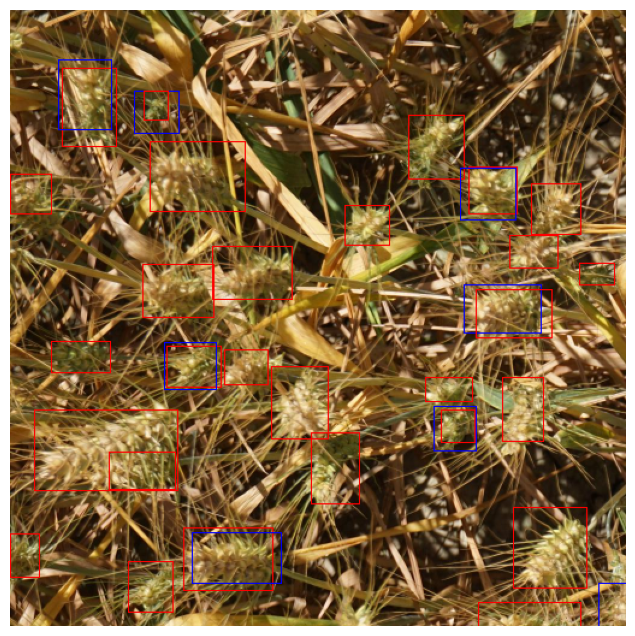

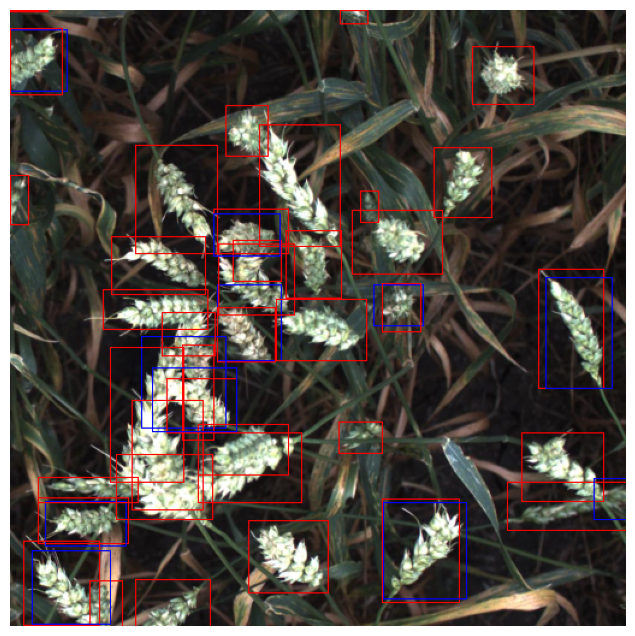

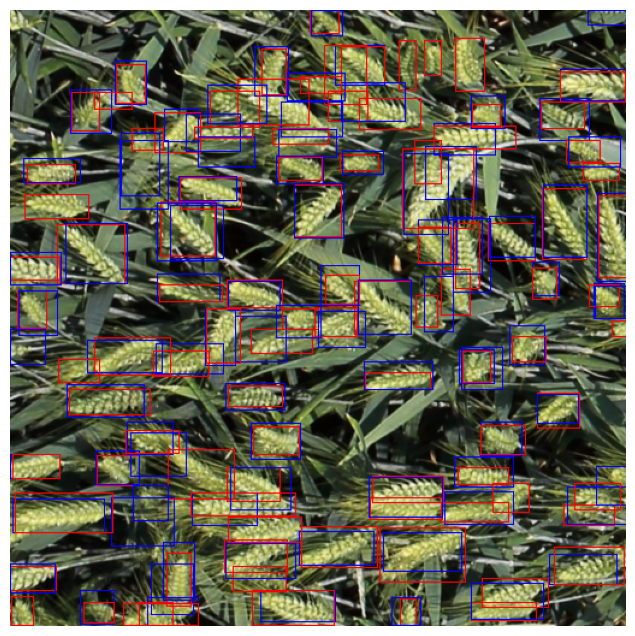

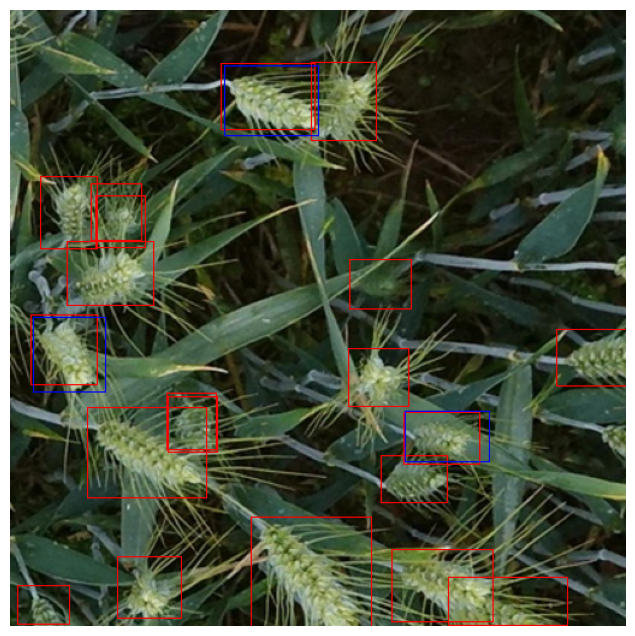

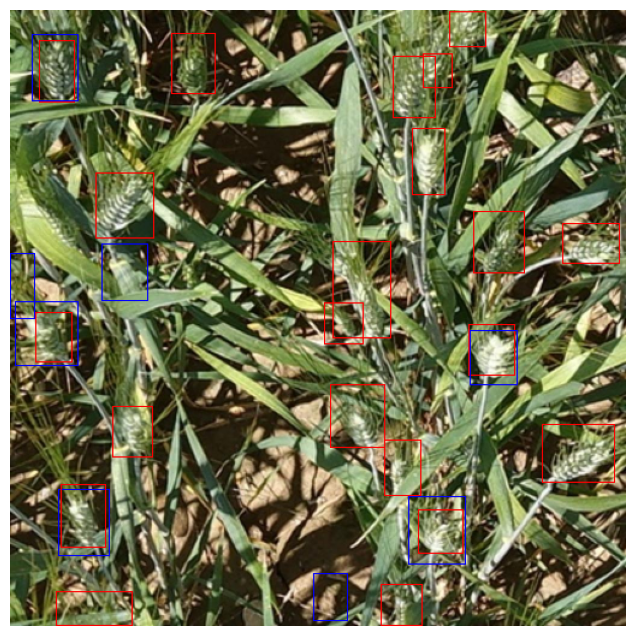

In [ ]:
from src.model import DETRModel
model = DETRModel(num_classes=num_classes,num_queries=num_queries)
model.load_state_dict(torch.load(model_weights_file))
model_eval(df_folds[df_folds['fold'] == 0],model=model,device=torch.device('cpu'), marking=marking, BATCH_SIZE=BATCH_SIZE)